<a href="https://colab.research.google.com/github/Soulhox/heartAttackClassification/blob/main/Proyecto_final_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Imports utilizados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn import decomposition
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

2. Leer la base de datos:

A partir de la pagina web se obtiene la tabla HEART.XLSX, esta contiene todos los datos adquiridos para realizar el entrenamiento de todos los algoritmos. 

In [ ]:
#Heart
df=pd.read_csv("heart.csv", sep=',',header=0)
y=df.iloc[:,13:14]
Y = y.to_numpy()
H=df.iloc[:,0:13]
X=H.values
print("Y: \n", Y.T, Y.shape)
print("X: \n", X, X.shape)


Y: 
 [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]] (303, 1)
X: 
 [[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]] (303, 13)


3. Preprocesar los datos:

Este dataset no requiere preprocesamiento ya que no hace falta ningún dato en ninguna columna, además de esto todos los datos son numéricos.

4. Escalizar los datos:
Se realiza una escalización a los datos para facilitar su procesamiento y se divide el dataset entre entrenamiento y validación.

In [ ]:
#scaler = StandardScaler()
scaler = sklearn.preprocessing.MinMaxScaler(feature_range = (-1,1))
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled)
df = pd.DataFrame(X_scaled)
df.to_csv('/content/example.csv')


[[ 0.41666667  1.          1.         ... -1.         -1.
  -0.33333333]
 [-0.66666667  1.          0.33333333 ... -1.         -1.
   0.33333333]
 [-0.5        -1.         -0.33333333 ...  1.         -1.
   0.33333333]
 ...
 [ 0.625       1.         -1.         ...  0.          0.
   1.        ]
 [ 0.16666667  1.         -1.         ...  0.         -0.5
   1.        ]
 [ 0.16666667 -1.         -0.33333333 ...  0.         -0.5
   0.33333333]]


5. Aplicar PCA

In [ ]:
pca = decomposition.PCA(n_components=13, svd_solver='full')
pca.fit(X_scaled)
X_train_pca = pca.transform(X_scaled)
print("varianza explicada por cada caracteristica después de PCA:",pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_[0:13]))
print(X_train_pca)
X_train, X_test, y_train, y_test = train_test_split(X_train_pca, Y, random_state=0)
df = pd.DataFrame(X_train_pca)
df.to_csv('/content/example2.csv')

varianza explicada por cada caracteristica después de PCA: [0.27038127 0.18743662 0.1252547  0.08969606 0.08284437 0.06152327
 0.05556614 0.03414654 0.03067008 0.02228809 0.01599219 0.01391614
 0.01028452]
1.0
[[-3.56685952e-01 -9.16650052e-01  2.27444362e+00 ...  6.43308211e-04
   2.24990406e-01 -3.78961214e-02]
 [-2.69506036e-01 -7.70383054e-01 -9.59797860e-03 ...  1.88410635e-01
   3.23275311e-01  1.14755882e-01]
 [-1.32010981e+00  8.60091180e-01 -3.33140590e-01 ...  4.65883762e-01
  -1.85332693e-01 -1.83127301e-01]
 ...
 [ 4.17684189e-01 -6.49213478e-01  1.59278872e+00 ...  3.93475920e-01
   1.11285651e-01 -3.33687570e-01]
 [ 1.71774642e+00  1.08782776e-01 -4.47319563e-01 ... -1.41552507e-01
  -3.84439722e-01 -3.81806614e-01]
 [-1.07095748e+00  1.02667002e+00  2.00850582e-02 ... -4.43390566e-01
   1.46015653e-01 -2.29543583e-01]]


LOGISTIC REGRESSION

1. Utilizando el conjunto de entrenamiento, se emplea la función LogisticRegression y se prueba con diferentes parámetros y configuraciones que permitan mejorar las metricas de evaluación del modelo.



1.1 Se utiliza un for para iterar entre valores de C (regularización) e iteraciones, a partir de los datos que retorne este ciclo se realiza la configuración de los parámetros del algoritmo.

In [ ]:
corcoef = []
regularization = []
iter = []
for C in np.linspace(0.1,10,100):
  clf = LogisticRegression(penalty='l2',max_iter=10000,random_state=0, C = C, class_weight = 'balanced', solver = 'liblinear').fit(X_train, np.ravel(y_train))
  y_test_predicted = clf.predict(X_test)
  y_test_scores = clf.predict_proba(X_test)
  corcoef.append(matthews_corrcoef(y_test, y_test_predicted))
  regularization.append(C)
max_score = max(corcoef)
best_C = corcoef.index(max_score)
print(max_score)
print(regularization[best_C])

0.6517059369140351
3.4000000000000004


In [ ]:
clf = LogisticRegression(penalty='l2',max_iter=1000,random_state=0, C = 3.4, class_weight = "balanced", solver = 'liblinear').fit(X_train, np.ravel(y_train))
y_test_predicted = clf.predict(X_test)
y_test_scores = clf.predict_proba(X_test)
print('Correlación', matthews_corrcoef(y_test, y_test_predicted))

Correlación 0.6517059369140351


1.2 Se obtienen las metricas

Accuracy of LR classifier on training set: 0.85
Accuracy of LR classifier on test set: 0.83
coeficiente de matthews: 0.6517059369140351
F1 Score:  0.8289473684210527


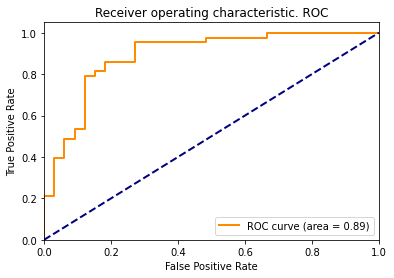

In [ ]:
print('Accuracy of LR classifier on training set: {:.2f}'
    .format(clf.score(X_train, np.ravel(y_train))))
print('Accuracy of LR classifier on test set: {:.2f}'
    .format(clf.score(X_test, np.ravel(y_test))))

y_test_predicted = clf.predict(X_test)
y_test_scores = clf.predict_proba(X_test)
print('coeficiente de matthews: '+ str(matthews_corrcoef(y_test, y_test_predicted)))
ACC = accuracy_score(y_test, y_test_predicted)
#print("Accuracy", ACC)
print("F1 Score: ", f1_score(y_test, y_test_predicted, average='micro'))
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores[:,1])
roc_auc=roc_auc_score(y_test, y_test_scores[:,1])
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

Observamos que el clasificador lineal retorna unos datos bastante buenos, la correlación en este caso ronda los 0.65 en el conjunto de testing, al ser mayor a 0.5 este indica que las predicciones son bastante acertadas, además al observar tanto el valor de F1 como la curva ROC se determina un muy buen funcionamiento por parte de este modelo LR. Nótese que el Accuracy tanto para el training como para el test son bastante similares, esto nos permite determinar si el algoritmo está sobreentrenado, en este caso funciona bien manteniendo unos valores cercanos entre entrenamiento y pruebas.

KNN


1. Se procede a realizar el calculo de el mejor K y la mejor distancia para nuestro modelo.

Para ello se varían los siguientes parametros:
Distance = Minkowski, euclidean, manhattan, chebyshev, seuclidean, mahalanobis

weights = Uniform, distance

n_neighbors = rango ajustable, se realizan pruebas de 1 a 20 y se escoge el mejor 

Se crea un for que permite iterar entre la cantidad de vecinos, se varía cada parametro para probar su eficiencia y se imprime el score y el K que lo optimiza para cada uno, se van registrando los datos del K y el score uno por uno hasta llegar a los mejores hiperparametros para configurar el clasificador.





max_score 0.868421052631579
best_k 4
minkowski-distance - K=4 SCORE=0.868421
minkowski-uniform - K=4 SCORE=0.881578
euclidean-distance - K=4 SCORE=0.868421
euclidean-uniform - K=4 SCORE=0.881578
manhattan-distance - K=6 SCORE=0.855263
manhattan-uniform - K=4 SCORE=0.855263
chebyshev-distance - K=3 SCORE=0.842105
chebyshev-uniform - K=3 SCORE=0.842105


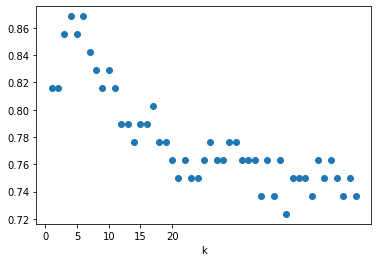

In [ ]:
k_range = range(1, 50)
scores = []
distance=['minkowski','euclidean','manhattan','chebyshev','seuclidean','mahalanobis']
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k,weights='distance',metric=distance[1], metric_params=None,algorithm='auto')
    knn.fit(X_train, np.ravel(y_train))
    scores.append(knn.score(X_test, y_test))
max_score = max(scores)
best_k = scores.index(max_score)+1
print("max_score",max_score)
print("best_k",best_k)
plt.figure()
plt.xlabel('k')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

print('minkowski-distance - K=4 SCORE=0.868421')
print('minkowski-uniform - K=4 SCORE=0.881578')

print('euclidean-distance - K=4 SCORE=0.868421')
print('euclidean-uniform - K=4 SCORE=0.881578')

print('manhattan-distance - K=6 SCORE=0.855263')
print('manhattan-uniform - K=4 SCORE=0.855263')

print('chebyshev-distance - K=3 SCORE=0.842105')
print('chebyshev-uniform - K=3 SCORE=0.842105')

3. Se elige entonces minkowski uniform con k = 4 y se emplea el clasificador. Se observa entonces el mcc y F1 tanto en train como en test.




Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.88
coeficiente de matthews: 0.7601021471234662
F1 Score:  0.881578947368421


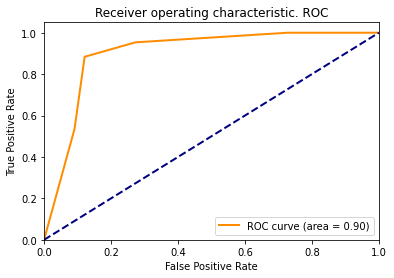

In [ ]:
n_neighbors = 4
distance=['minkowski','euclidean','manhattan','chebyshev','seuclidean','mahalanobis']

knn = KNeighborsClassifier(n_neighbors,weights='uniform',metric=distance[0], metric_params=None,algorithm='auto')
knn.fit(X_train, np.ravel(y_train))

print('Accuracy of K-NN classifier on training set: {:.2f}'
    .format(knn.score(X_train, np.ravel(y_train))))
print('Accuracy of K-NN classifier on test set: {:.2f}'
    .format(knn.score(X_test, np.ravel(y_test))))

y_test_predicted = knn.predict(X_test)
y_test_scores = knn.predict_proba(X_test)
print('coeficiente de matthews: '+ str(matthews_corrcoef(y_test, y_test_predicted)))
ACC = accuracy_score(y_test, y_test_predicted)
#print("Accuracy", ACC)
print("F1 Score: ", f1_score(y_test, y_test_predicted, average='micro'))
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores[:,1])
roc_auc=roc_auc_score(y_test, y_test_scores[:,1])
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

# Redes neuronales perceptron multicapa




1.   Se realiza la identificación del mejor solver y la mejor activación.



In [ ]:
solvers = ["lbfgs", "sgd","adam"]
activations =['identity', 'logistic', 'tanh', 'relu']
scores=[]


for z in activations:
  clf = MLPClassifier(random_state=1, max_iter=10000, solver=solvers[0], activation=z).fit(X_train, np.ravel(y_train))
  scores.append(clf.score(X_test, y_test))
#clf.score(X_test, y_test)
max_score = max(scores)
best_act = scores.index(max_score)
print("max_score",max_score)
print("best_Activation",best_act)

max_score 0.8552631578947368
best_Activation 1



2.   Ya con el mejor solver y la mejor activación, se busca el mejor tamaño de capas.



In [ ]:
solvers = ["lbfgs", "sgd","adam"]
activations =['identity', 'logistic', 'tanh', 'relu']
scores=[]

for z in range(1,20):
  clf = MLPClassifier(random_state=1, max_iter=10000, solver=solvers[0], activation=activations[1], hidden_layer_sizes=(5, z)).fit(X_train, np.ravel(y_train))
  scores.append(clf.score(X_test, y_test))
#clf.score(X_test, y_test)
max_score = max(scores)
best_lay = scores.index(max_score)+1
print("max_score",max_score)
print("best_Layer",best_lay)

max_score 0.868421052631579
best_Layer 6




3.   Por ultimo se evalua el learning rate para encontrar el mejor.




In [ ]:
solvers = ["lbfgs", "sgd","adam"]
activations =['identity', 'logistic', 'tanh', 'relu']
learnn=["constant","invscaling","adaptive"]
vec=[]
scores=[]
#lay = 

for z in np.linspace(0.001,0.1,100):
  clf = MLPClassifier(random_state=1, max_iter=10000, solver=solvers[0], activation=activations[1], hidden_layer_sizes=(5, 6), learning_rate_init=z,learning_rate=learnn[2]).fit(X_train, np.ravel(y_train))
  vec.append(z)
  scores.append(clf.score(X_test, y_test))
#clf.score(X_test, y_test)
max_score = max(scores)
best_learn = scores.index(max_score)
print("max_score",max_score)
print("best_initiation",best_learn)
print(vec[best_Act])

max_score 0.868421052631579
best_Activation 0
0.001


**constant LR**

max_score 0.868421052631579

best_Activation 0

0.001

**invscaling LR**

max_score 0.868421052631579

best_Activation 0

0.001

**adaptive LR**

max_score 0.868421052631579

best_Activation 0

0.001


Como conclusión se encontro que el solver lbfgs, con una activasion logistica, con un learning rate de 0.001 nos da los siguientes valores de calificación:

Accuracy of MLPC classifier on training set: 0.96
Accuracy of MLPC classifier on test set: 0.87
coeficiente de matthews: 0.7400679502291563
F1 Score:  0.868421052631579


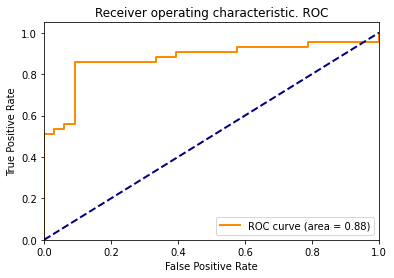

In [ ]:
solvers = ["lbfgs", "sgd","adam"]
activations =['identity', 'logistic', 'tanh', 'relu']
learnn=["constant","invscaling","adaptive"]



clf = MLPClassifier(random_state=1, max_iter=10000, solver=solvers[0], activation=activations[1], hidden_layer_sizes=(5, 6), learning_rate_init=0.001,learning_rate=learnn[2]).fit(X_train, np.ravel(y_train))

print('Accuracy of MLPC classifier on training set: {:.2f}'
    .format(clf.score(X_train, np.ravel(y_train))))
print('Accuracy of MLPC classifier on test set: {:.2f}'
    .format(clf.score(X_test, np.ravel(y_test))))

y_test_predicted = clf.predict(X_test)
y_test_scores = clf.predict_proba(X_test)
print('coeficiente de matthews: '+ str(matthews_corrcoef(y_test, y_test_predicted)))
ACC = accuracy_score(y_test, y_test_predicted)
#print("Accuracy", ACC)
print("F1 Score: ", f1_score(y_test, y_test_predicted, average='micro'))
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores[:,1])
roc_auc=roc_auc_score(y_test, y_test_scores[:,1])
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()
